In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from adaptive_al_v2.utils.data_loader import load_imdb

sns.set(style="whitegrid")


C:\Users\Nagham Omar\PycharmProjects\deltaf1-hybrid-active-learning\.venv1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [2]:
_,(df_train, df_val, df_test) = load_imdb()

df = pd.concat([df_train, df_val, df_test])
print(df.shape)
df.head()

(50000, 2)


,text,label
0,The movie starts off as we see a footage of a ...,0
1,This is an excellent stand-up DVD! Eddie Izzar...,1
2,Though I've yet to review the movie in about t...,0
3,"As a big fan of David Mamet's films and plays,...",0
4,This move is bad on so many levels I don't eve...,0


##  Label Distribution

C:\Users\Nagham Omar\AppData\Local\Temp\ipykernel_5448\3382674288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="pastel")


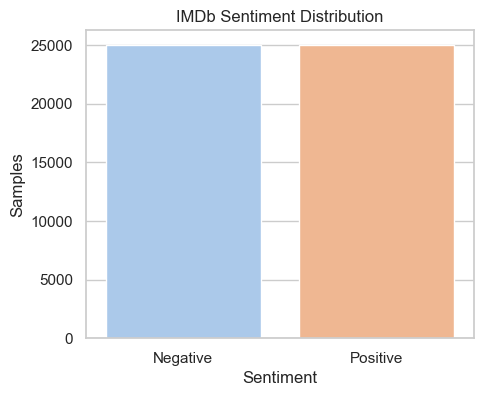

In [3]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="label", palette="pastel")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("IMDb Sentiment Distribution")
plt.ylabel("Samples")
plt.xlabel("Sentiment")
plt.show()


##  Text Length Analysis

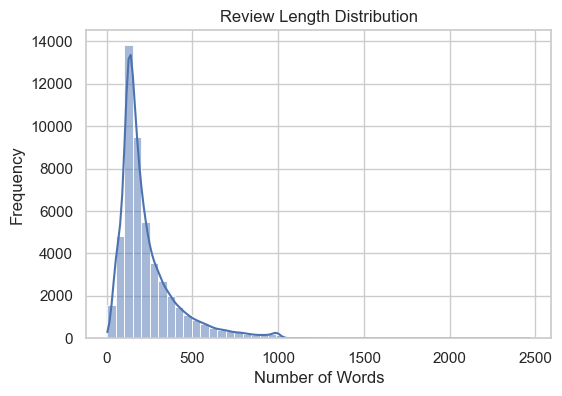

In [4]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


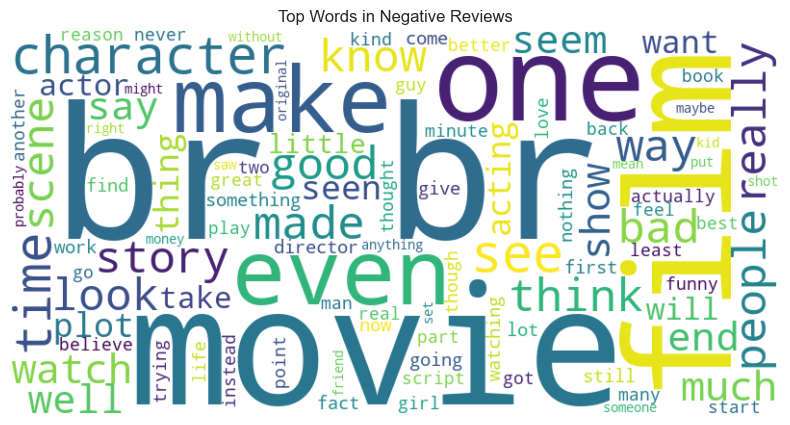

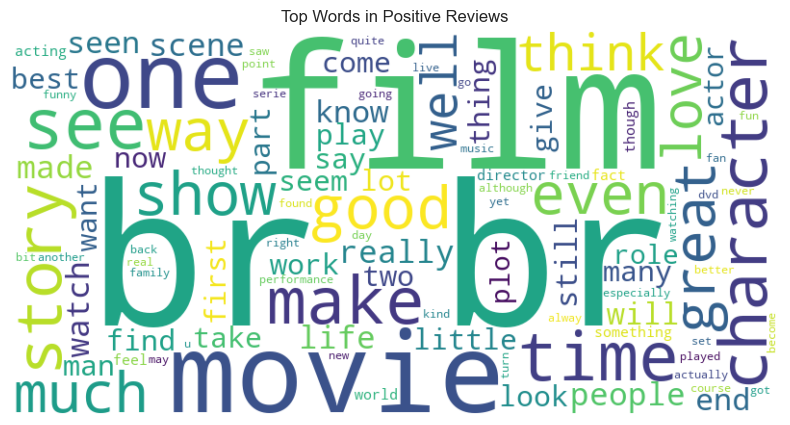

In [5]:
stopwords = set(STOPWORDS)

for label_id, label_name in {0: "Negative", 1: "Positive"}.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["text"]).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Reviews")
    plt.show()
